In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import cv2 as cv
import pandas as pd
from typing import List
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image

cudnn.benchmark = True
plt.ion()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class LoadDataset:
  def __init__(self, path: str):
    self.path = path

  def collect_image_files(self) -> List[str]:
    """
    Collects image files from the specified directory.

    Returns:
        List[str]: List of image file paths.
    """
    image_files = []
    for dirname, _, filenames in os.walk(self.path):
      for filename in filenames:
        image_files.append(os.path.join(dirname, filename))
    return image_files

  def show_images(self, images_list: List[str], rows: int=10, cols: int=10):
    """
    Displays a grid of images.

    Args:
        images_list (List[str]): List of image file paths.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    axes = axes.flatten()
    for i, image_path in enumerate(images_list):
      if i >= rows * cols:
        break
      try:
        img = cv.imread(image_path)
        if img is None:
          raise Exception(f"Failed to load image: {image_path}")

        axes[i].imshow(img)

      except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

    plt.tight_layout()
    plt.show()

In [ ]:
folder_a = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_a_samples"
folder_aw = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_aw_samples"
folder_aa = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_aa_samples"
folder_d = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_d_samples"
folder_dd = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_dd_samples"
folder_e = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_e_samples"
folder_ee = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_ee_samples"
folder_o = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_o_samples"
folder_oo = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_oo_samples"
folder_ow = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_ow_samples"
folder_u = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_u_samples"
folder_uw = "/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/Raw Data/letter_uw_samples"

In [ ]:
letter_a = LoadDataset(folder_a)
images_a = letter_a.collect_image_files()
letter_aw = LoadDataset(folder_aw)
images_aw = letter_aw.collect_image_files()
letter_aa = LoadDataset(folder_aa)
images_aa = letter_aa.collect_image_files()
letter_d = LoadDataset(folder_d)
images_d = letter_d.collect_image_files()
letter_dd = LoadDataset(folder_dd)
images_dd = letter_dd.collect_image_files()
letter_e = LoadDataset(folder_e)
images_e = letter_e.collect_image_files()
letter_ee = LoadDataset(folder_ee)
images_ee = letter_ee.collect_image_files()
letter_o = LoadDataset(folder_o)
images_o = letter_o.collect_image_files()
letter_oo = LoadDataset(folder_oo)
images_oo = letter_oo.collect_image_files()
letter_ow = LoadDataset(folder_ow)
images_ow = letter_ow.collect_image_files()
letter_u = LoadDataset(folder_u)
images_u = letter_u.collect_image_files()
letter_uw = LoadDataset(folder_uw)
images_uw = letter_uw.collect_image_files()

In [ ]:
# Label data
a_labeled_images = {a_image: 'a' for a_image in images_a}
aw_labeled_images = {aw_image: 'ă' for aw_image in images_aw}
aa_labeled_images = {aa_image: 'â' for aa_image in images_aa}
d_labeled_images = {d_image: 'd' for d_image in images_d}
dd_labeled_images = {dd_image: 'đ' for dd_image in images_dd}
e_labeled_images = {e_image: 'e' for e_image in images_e}
ee_labeled_images = {ee_image: 'ê' for ee_image in images_ee}
o_labeled_images = {o_image: 'o' for o_image in images_o}
oo_labeled_images = {oo_image: 'ô' for oo_image in images_oo}
ow_labeled_images = {ow_image: 'ơ' for ow_image in images_ow}
u_labeled_images = {u_image: 'u' for u_image in images_u}
uw_labeled_images = {uw_image: 'ư' for uw_image in images_uw}

In [ ]:
all_images = {**a_labeled_images, **aw_labeled_images, **aa_labeled_images, \
              **d_labeled_images, **dd_labeled_images, \
              **e_labeled_images, **ee_labeled_images, \
              **o_labeled_images, **oo_labeled_images, **ow_labeled_images, \
              **u_labeled_images, **uw_labeled_images}

In [ ]:
# Convert data into dataframe
df = pd.DataFrame(list(all_images.items()), columns=['image_file', 'label'])
df

,image_file,label
0,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
1,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
2,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
3,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
4,/content/drive/MyDrive/24-25 Academic Year/CS1...,a
...,...,...
1195,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư
1196,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư
1197,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư
1198,/content/drive/MyDrive/24-25 Academic Year/CS1...,ư


In [55]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.optim import lr_scheduler
import copy
import numpy as np
from tqdm import tqdm
from PIL import Image
import os
from typing import Tuple, Dict, Any
from sklearn.model_selection import train_test_split
import pandas as pd

class ImageDataset(Dataset):
    """
    Custom dataset class that handles image loading and augmentation on-the-fly.
    Supports different transforms for training and validation/testing.
    """
    def __init__(self, dataframe, is_training=True, augmentation_factor=3):
        self.dataframe = dataframe
        self.is_training = is_training
        self.augmentation_factor = augmentation_factor if is_training else 1

        # Create label mapping and count classes
        unique_labels = sorted(dataframe['label'].unique())
        self.label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
        self.num_classes = len(unique_labels)

        # Calculate class weights for balanced training
        class_counts = dataframe['label'].value_counts()
        total_samples = len(dataframe)
        self.class_weights = torch.tensor([
            total_samples / (self.num_classes * class_counts[label])
            for label in sorted(class_counts.index)
        ])

        # Store the base size (actual number of images)
        self.base_size = len(dataframe)

        # Create transforms based on training/validation mode
        if is_training:
            self.transform = transforms.Compose([
                transforms.Resize(256),
                transforms.RandomCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                transforms.RandomRotation(15),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

        # Print dataset information
        print(f"Dataset Summary:")
        print(f"  Base number of images: {self.base_size}")
        print(f"  Number of classes: {self.num_classes}")
        print(f"  Augmentation factor: {self.augmentation_factor}")
        print(f"  Effective dataset size: {len(self)}")
        print(f"  Mode: {'Training' if is_training else 'Validation/Testing'}")
        print(f"  Label mapping: {self.label_to_idx}")

    def __len__(self):
        # Return effective size (base size × augmentation factor)
        return self.base_size * self.augmentation_factor

    def __getitem__(self, idx):
        # Map the augmented index back to the original image index
        original_idx = idx % self.base_size

        # Load and transform the image
        img_path = self.dataframe.iloc[original_idx]['image_file']
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image not found at {img_path}")

        try:
            image = Image.open(img_path).convert('RGB')
            image = self.transform(image)
        except Exception as e:
            raise Exception(f"Error loading image {img_path}: {str(e)}")

        # Get label
        label = self.dataframe.iloc[original_idx]['label']
        label_idx = self.label_to_idx[label]

        return image, label_idx

class ResNet18Classifier(nn.Module):
    """
    Custom ResNet18 classifier with modified head for fine-tuning.
    Includes dropout and batch normalization in the classifier head.
    """
    def __init__(self, num_classes: int, dropout_rate: float = 0.5):
        super().__init__()
        # Load pretrained ResNet18
        self.resnet = torchvision.models.resnet18(weights='IMAGENET1K_V1')

        # Freeze early layers
        for param in list(self.resnet.parameters())[:-2]:  # Keep last conv block and FC trainable
            param.requires_grad = False

        # Modify classifier head
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(num_ftrs, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),  # Reduce dropout in later layers
            nn.Linear(512, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.resnet(x)

def prepare_data_and_train(
    df: pd.DataFrame,
    device: torch.device,
    batch_size: int = 32,
    num_epochs: int = 11,
    learning_rate: float = 0.001,
    augmentation_factor: int = 3
) -> Tuple[ResNet18Classifier, Dict[str, list], Tuple[DataLoader, DataLoader, DataLoader]]:
    """
    Complete pipeline for preparing data and training the model.

    Args:
        df: DataFrame with 'image_file' and 'label' columns
        device: torch.device for training
        batch_size: Batch size for training
        num_epochs: Number of epochs to train
        learning_rate: Initial learning rate
        augmentation_factor: Number of augmented versions per image during training
    """
    # Create train/val/test splits
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
    train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

    # Create datasets with appropriate transforms
    train_dataset = ImageDataset(train_df, is_training=True, augmentation_factor=augmentation_factor)
    val_dataset = ImageDataset(val_df, is_training=False)
    test_dataset = ImageDataset(test_df, is_training=False)

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )

    # Initialize model
    model = ResNet18Classifier(num_classes=train_dataset.num_classes).to(device)

    # Setup optimization
    criterion = nn.CrossEntropyLoss(reduction='none')  # For per-sample weighting

    # Different learning rates for different layers
    params_to_update = [
        {'params': model.resnet.layer4.parameters(), 'lr': learning_rate},  # Last conv block
        {'params': model.resnet.fc.parameters(), 'lr': learning_rate * 10}  # Classifier head
    ]

    optimizer = torch.optim.AdamW(params_to_update, weight_decay=0.01)

    # Learning rate scheduler
    scheduler = lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer,
        T_0=5,  # First restart epoch
        T_mult=2,  # Multiply T_0 by this factor after each restart
        eta_min=1e-6  # Minimum learning rate
    )

    # Train model
    model, history = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        device=device,
        num_epochs=num_epochs,
        class_weights=train_dataset.class_weights
    )

    return model, history, (train_loader, val_loader, test_loader)

def train_model(
    model: ResNet18Classifier,
    train_loader: DataLoader,
    val_loader: DataLoader,
    criterion: nn.Module,
    optimizer: torch.optim.Optimizer,
    scheduler: torch.optim.lr_scheduler._LRScheduler,
    device: torch.device,
    num_epochs: int = 11,
    class_weights: torch.Tensor = None
) -> Tuple[ResNet18Classifier, Dict[str, list]]:
    """
    Trains the model with comprehensive monitoring and early stopping.

    Args:
        model: The ResNet18 model to train
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        criterion: Loss function
        optimizer: Optimizer
        scheduler: Learning rate scheduler
        device: Device to train on
        num_epochs: Number of epochs to train
        class_weights: Optional tensor of class weights for balanced training
    """
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    patience = 7
    patience_counter = 0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader, desc=phase):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        if class_weights is not None:
                            loss = (loss * class_weights[labels].to(device)).mean()
                        else:
                            loss = loss.mean()
                        loss.backward()
                        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                        optimizer.step()
                    else:
                        loss = loss.mean()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Early stopping logic
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                patience_counter = 0
            elif phase == 'val':
                patience_counter += 1
                if patience_counter >= patience:
                    print("Early stopping triggered")
                    model.load_state_dict(best_model_wts)
                    return model, history

    model.load_state_dict(best_model_wts)
    return model, history

In [57]:
if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Train the model
    model, history, (train_loader, val_loader, test_loader) = prepare_data_and_train(
        df=df,
        device=device,
        batch_size=32,
        num_epochs=11,
        learning_rate=0.001,
        augmentation_factor=3
    )

Dataset Summary:
  Base number of images: 768
  Number of classes: 12
  Augmentation factor: 3
  Effective dataset size: 2304
  Mode: Training
  Label mapping: {'a': 0, 'd': 1, 'e': 2, 'o': 3, 'u': 4, 'â': 5, 'ê': 6, 'ô': 7, 'ă': 8, 'đ': 9, 'ơ': 10, 'ư': 11}
Dataset Summary:
  Base number of images: 192
  Number of classes: 12
  Augmentation factor: 1
  Effective dataset size: 192
  Mode: Validation/Testing
  Label mapping: {'a': 0, 'd': 1, 'e': 2, 'o': 3, 'u': 4, 'â': 5, 'ê': 6, 'ô': 7, 'ă': 8, 'đ': 9, 'ơ': 10, 'ư': 11}
Dataset Summary:
  Base number of images: 240
  Number of classes: 12
  Augmentation factor: 1
  Effective dataset size: 240
  Mode: Validation/Testing
  Label mapping: {'a': 0, 'd': 1, 'e': 2, 'o': 3, 'u': 4, 'â': 5, 'ê': 6, 'ô': 7, 'ă': 8, 'đ': 9, 'ơ': 10, 'ư': 11}


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 0/10
----------


train: 100%|██████████| 72/72 [04:26<00:00,  3.70s/it]


train Loss: 1.2389 Acc: 0.5742


val: 100%|██████████| 6/6 [00:20<00:00,  3.41s/it]


val Loss: 0.4231 Acc: 0.8229
Epoch 1/10
----------


train: 100%|██████████| 72/72 [04:23<00:00,  3.65s/it]


train Loss: 0.8940 Acc: 0.6827


val: 100%|██████████| 6/6 [00:20<00:00,  3.47s/it]


val Loss: 0.3880 Acc: 0.8229
Epoch 2/10
----------


train: 100%|██████████| 72/72 [04:25<00:00,  3.68s/it]


train Loss: 0.7565 Acc: 0.7305


val: 100%|██████████| 6/6 [00:20<00:00,  3.35s/it]


val Loss: 0.3127 Acc: 0.9010
Epoch 3/10
----------


train: 100%|██████████| 72/72 [04:38<00:00,  3.87s/it]


train Loss: 0.6803 Acc: 0.7474


val: 100%|██████████| 6/6 [00:20<00:00,  3.35s/it]


val Loss: 0.2288 Acc: 0.9427
Epoch 4/10
----------


train: 100%|██████████| 72/72 [04:23<00:00,  3.66s/it]


train Loss: 0.5348 Acc: 0.7912


val: 100%|██████████| 6/6 [00:20<00:00,  3.39s/it]


val Loss: 0.1908 Acc: 0.9688
Epoch 5/10
----------


train: 100%|██████████| 72/72 [04:24<00:00,  3.67s/it]


train Loss: 0.6625 Acc: 0.7717


val: 100%|██████████| 6/6 [00:23<00:00,  3.95s/it]


val Loss: 0.2241 Acc: 0.9375
Epoch 6/10
----------


train: 100%|██████████| 72/72 [04:12<00:00,  3.51s/it]


train Loss: 0.7470 Acc: 0.7413


val: 100%|██████████| 6/6 [00:19<00:00,  3.26s/it]


val Loss: 0.4423 Acc: 0.8646
Epoch 7/10
----------


train: 100%|██████████| 72/72 [04:13<00:00,  3.53s/it]


train Loss: 0.6964 Acc: 0.7526


val: 100%|██████████| 6/6 [00:19<00:00,  3.26s/it]


val Loss: 0.2522 Acc: 0.9375
Epoch 8/10
----------


train: 100%|██████████| 72/72 [04:11<00:00,  3.49s/it]


train Loss: 0.6476 Acc: 0.7639


val: 100%|██████████| 6/6 [00:19<00:00,  3.31s/it]


val Loss: 0.2531 Acc: 0.9427
Epoch 9/10
----------


train: 100%|██████████| 72/72 [04:08<00:00,  3.46s/it]


train Loss: 0.6056 Acc: 0.7795


val: 100%|██████████| 6/6 [00:19<00:00,  3.25s/it]


val Loss: 0.2065 Acc: 0.9531
Epoch 10/10
----------


train: 100%|██████████| 72/72 [04:12<00:00,  3.51s/it]


train Loss: 0.5712 Acc: 0.7869


val: 100%|██████████| 6/6 [00:19<00:00,  3.25s/it]


val Loss: 0.1948 Acc: 0.9583


Text(0.5, 0, 'Epoch')

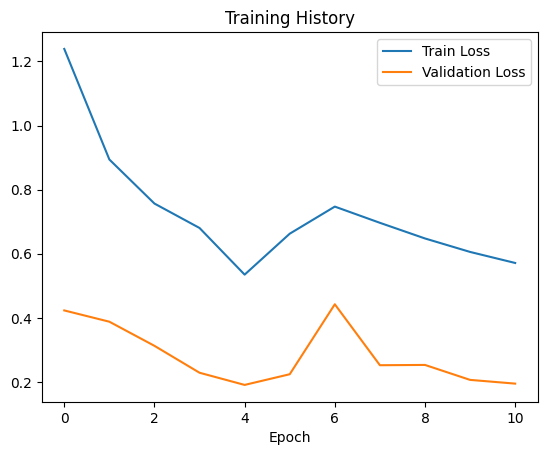

In [59]:
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')
plt.xlabel('Epoch')

In [62]:
def evaluate_model(model, dataloader, device):
    """
    Evaluates the model on the given dataloader.

    Args:
        model: The trained model.
        dataloader: The dataloader for the evaluation data.
        device: The device to run the evaluation on.

    Returns:
        Tuple[float, float]: The average loss and accuracy on the evaluation data.
    """
    model.eval()  # Set model to evaluation mode

    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():  # Disable gradient calculations during evaluation
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = nn.CrossEntropyLoss()(outputs, labels)  # Calculate loss

            running_loss += loss.item() * inputs.size(0)  # Accumulate loss
            running_corrects += torch.sum(preds == labels.data)  # Accumulate correct predictions

    avg_loss = running_loss / len(dataloader.dataset)  # Calculate average loss
    avg_acc = running_corrects.double() / len(dataloader.dataset)  # Calculate average accuracy

    return avg_loss, avg_acc # Return both avg_loss and avg_acc

In [64]:
start_test_time = time.time()
test_loss, test_acc = evaluate_model(model, test_loader, device)
end_test_time = time.time()
print(f"Test time: {end_test_time - start_test_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test time: 24.23 seconds
Test Loss: 0.2457, Test Accuracy: 0.9292
